In [27]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import imageio
import os
import pandas as pd
import openpyxl
import datacompy as cp

## Data extraction and Raw analysis (Hist ttest etc...)

In [9]:
PATH = "../../sample_data/1997TS"
# WIND SPEED OF GUST
FG = "fg.T1Hmax.UMRA2T.19970518_19970521.TC01B.1p5km.nc"
FG1 = "fg.T1Hmax.UMRA2T.19970518_19970521.TC01B.4p4km.nc"
FG2 = "fg_265_1997.npz"

df = nc.Dataset(f"{PATH}/{FG}")
df1 = nc.Dataset(f"{PATH}/{FG1}")
df2 = np.load(f"{PATH}/{FG2}", allow_pickle=True)

In [30]:
df1fg= df.variables['wind_speed_of_gust'][0]
df1.variables['wind_speed_of_gust']
df1fg.head(10)

AttributeError: 'MaskedArray' object has no attribute 'head'

In [10]:
lst = df2.files
# ls2 = lst.isnan()
hist_list = []
avg_list = []
for item in lst:
    x = df2[item]
    #print(np.shape(x[300]))
    for arr in x: 
        if len(arr[~np.isnan(arr)]) != 0:
            avg_list.append(sum(arr[~np.isnan(arr)])/len(arr[~np.isnan(arr)]))
        #print(np.shape(arr))
        #print(arr[~np.isnan(arr)])
        #print(np.shape(arr[~np.isnan(arr)]))
        for val in arr[~np.isnan(arr)]:
            #print(val)
            hist_list.append(val)
print(np.shape(hist_list))
print(np.shape(avg_list))


(1427671,)
(382,)


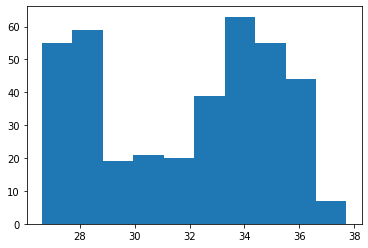

In [73]:
plt.hist(avg_list)
plt.show()

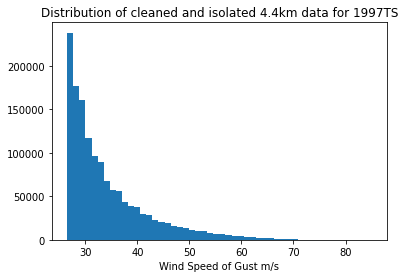

In [115]:
plt.hist(hist_list, bins=50)
plt.ylim(ymin = 0)
plt.xlabel('Wind Speed of Gust m/s')
plt.title('Distribution of cleaned and isolated 4.4km data for 1997TS')
plt.show()

In [12]:
ens_9_df = []
for i in range(0,48):
    ws_1p5 = df.variables["wind_speed_of_gust"][i][8]
    ens_9_df.append(ws_1p5)


In [17]:
ens_9_1p5 = np.array(ens_9_df)
ens_9_1p5 = ens_9_1p5.flatten()
ens_9_1p5Clean = np.array([np.where(val <= 26.5, np.nan, val)for val in ens_9_1p5 ])

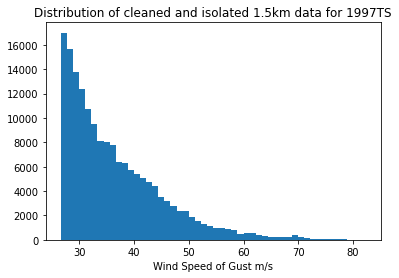

In [116]:
plt.hist(ens_9_1p5Clean[~np.isnan(ens_9_1p5Clean)], bins=50)
plt.ylim(ymin = 0)
plt.xlabel('Wind Speed of Gust m/s')
plt.title('Distribution of cleaned and isolated 1.5km data for 1997TS')
plt.show()

In [14]:
df_1p5_f9 = ens_9_1p5Clean[~np.isnan(ens_9_1p5Clean)]
df_4p4_f9 = hist_list

NameError: name 'ens_9_1p5Clean' is not defined

In [ ]:
print(np.mean(df_1p5_f9), np.std(df_1p5_f9), np.mean(df_4p4_f9), np.std(df_4p4_f9))
print(np.shape(df_1p5_f9), np.shape(df_4p4_f9))
print(stats.ttest_ind(df_1p5_f9,df_4p4_f9))
print(stats.ttest_ind_from_stats(36.455648504589874, 8.793266759905569, 168850, 34.1749, 7.882482, 1427671, equal_var = False))

36.455648504589874 8.793266759905569 34.1749 7.882482
(168850,) (1427671,)
Ttest_indResult(statistic=111.00664033552788, pvalue=0.0)
Ttest_indResult(statistic=101.85047040107483, pvalue=0.0)


## Clustering 

In [4]:
from gettext import npgettext
import re
import pandas as pd
import numpy as np
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import umap
from sklearn import preprocessing
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from sklearn.manifold import TSNE
import pickle
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
import plotly.express as px
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

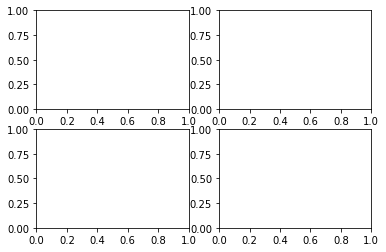

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

In [21]:
kmeans = KMeans(n_clusters=5, random_state=0)
y_pred_Kmeans = kmeans.fit_predict(ens_9_1p5)
scatter = ax2.scatter(df_1p5_f9,
                        c=y_pred_Kmeans, cmap='Paired', label='inline label', s=8)
legend3 = ax2.legend(*scatter.legend_elements(),
                        loc='center left', bbox_to_anchor=(1, 0.5), title="Class")
ax2.set_title("Data clustered by K-Means")
ax2.add_artist(legend3)
# print(nmi(reduced_df,y_pred_Kmeans))
km_shil = silhouette_score(df_1p5_f9, kmeans.labels_, metric='euclidean')
print(km_shil)
plt.xlabel('Z1')
plt.ylabel('Z1')

ValueError: Expected 2D array, got 1D array instead:
array=[4.375 4.375 4.25  ... 4.375 4.75  5.125].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Other 

In [11]:
ws_1p5 = df.variables["wind_speed_of_gust"]
ws_4p4 = df1.variables["wind_speed_of_gust"]
print(np.shape(ws_1p5))
print(np.shape(ws_4p4))
print(np.shape(df2))

(48, 9, 518, 400)
(48, 9, 790, 810)
(1,)


In [53]:
wind_speed = df.variables["wind_speed_of_gust"][:][0]
flat_speeds = wind_speed.flatten()
maximum = flat_speeds.max()

In [49]:
thresh_wind = np.array([np.where(frame < maximum * .5, 0, frame)for frame in flat_speeds ])

In [54]:
print(np.shape(wind_speed))
print(np.shape(flat_speeds[flat_speeds != 0]))
np.shape(thresh_wind[thresh_wind != 0])

(48, 9, 518, 400)


In [56]:
for i in range(1,9):
    wind_speed = df.variables["wind_speed_of_gust"][:][i]
    flat_speeds = wind_speed.flatten()
    maximum = flat_speeds.max()
    thresh_wind = np.array([np.where(frame < maximum * .5, 0, frame)for frame in flat_speeds ])
    print(i)
    print(np.shape(wind_speed))
    print(np.shape(flat_speeds[flat_speeds != 0]))
    np.shape(thresh_wind[thresh_wind != 0])
    pd.DataFrame.to_csv(str(i), index = None)

1
2
3
4
5
6
7
8
9


In [ ]:
iteration = 30
data = np.copy(p[iteration])
np.shape(data)

In [ ]:
# visualise all samples in selected iteration, no filtering
fig, ax = plt.subplots(nrows = 8, ncols = 8, figsize = (20,15))
ax = ax.flatten()
for x, axis in zip(data, ax):
    x = x[0]
    axis.contourf(x)
    axis.set_xticks([])
    axis.set_yticks([])
plt.show()

In [8]:
PATH = r"C:\Users\Bigzp\Desktop"
FILENAME = "wind_speed_of_gust1p5.1997.txt"
ws_dat = f"{PATH}/{FILENAME}"
ws_df = np.loadtxt(ws_dat, dtype=str)

C:\Users\Bigzp\Desktop/wind_speed_of_gust1p5.1997.txt


KeyboardInterrupt: 

In [9]:
ws_df

NameError: name 'ws_df' is not defined